In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
import scipy.optimize as spo

In [2]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    d_returns = df.copy()
    d_returns[1:] = (df[1:].values / df[:-1]) - 1
    d_returns.iloc[0, :] = 0
    return d_returns

In [3]:
dfSHOP = pd.read_csv('SHOP.csv',index_col='Date',parse_dates=True)

In [4]:
dfSQ = pd.read_csv('SQ.csv',index_col='Date',parse_dates=True)

In [5]:
drSQ = compute_daily_returns(dfSQ)

In [6]:
drSHOP = compute_daily_returns(dfSHOP)

In [7]:
drSHOP

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-21,-0.068929,0.082116,0.078391,0.102414,0.102414,-0.769081
2015-05-22,0.143076,-0.024437,0.118462,0.047333,0.047333,-0.711319
2015-05-26,0.029195,0.015491,-0.071527,-0.072513,-0.072513,-0.027554
2015-05-27,-0.101728,-0.099643,-0.019259,-0.001818,-0.001818,-0.498495
...,...,...,...,...,...,...
2020-06-26,-0.002194,-0.004363,-0.019653,0.013648,0.013648,0.007241
2020-06-29,0.012593,0.038743,0.051995,0.029032,0.029032,0.003138
2020-06-30,0.024322,0.061673,0.028210,0.071049,0.071049,0.254338


In [8]:
mean = drSQ['Close'].mean()

In [9]:
mean

0.0024545822674342365

In [10]:
std = drSQ['Close'].std()

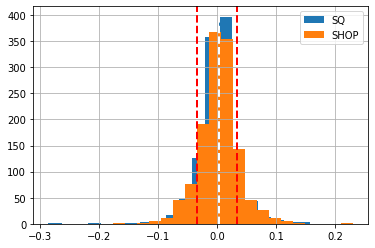

In [11]:
plt.axvline(mean,color='w',linestyle='dashed', linewidth=2)
plt.axvline(std,color='r',linestyle='dashed', linewidth=2)
plt.axvline(-std,color='r',linestyle='dashed', linewidth=2)
drSQ['Close'].hist(bins=20, label='SQ')
drSHOP['Close'].hist(bins=20, label='SHOP')
plt.legend()

In [12]:
def make_join(FollowFrame, Catagory,start_date='2019-01-01', end_date = '2020-06-29'):
    dates = pd.date_range(start_date,end_date)
    
    df1 = pd.DataFrame(index=dates) # make dates into a empty dataframe to merge with stock data
    catArray=['Date',Catagory]
    for i in range(len(FollowFrame)):
        df_temp = pd.read_csv("{}.csv".format(FollowFrame[i]),index_col='Date',parse_dates=True,usecols=catArray,na_values=['nan'])
        df_temp = df_temp.rename(columns={ Catagory : FollowFrame[i]})
        if i == 0:
            df1 = df1.join(df_temp,how='inner')
        else:
            df1 = df1.join(df_temp)
    return df1

In [13]:
shop_sq = make_join(["SHOP","SQ"],'Close')

In [14]:
shop_sq_dr = compute_daily_returns(shop_sq)

In [15]:
shop_sq_dr = shop_sq_dr[:-1]

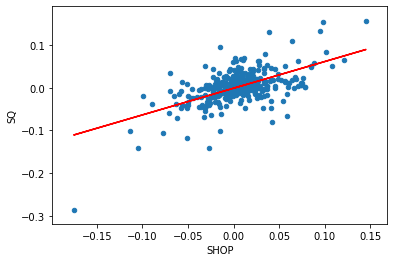

In [16]:
shop_sq_dr.plot(kind='scatter',x='SHOP',y='SQ')
beta_SHOP,aplha_SHOP = np.polyfit(shop_sq_dr['SHOP'],shop_sq_dr['SQ'],1)
plt.plot(shop_sq_dr['SHOP'],beta_SHOP*shop_sq_dr['SHOP']+aplha_SHOP,'-',color='r')
plt.show()

In [34]:
aplha_SHOP

IndexError: invalid index to scalar variable.

In [18]:
def daily_portfolio_value(df,allocations):
    normed = df / df[0]

In [79]:
def error_poly(C, data):
    """
    C: array with polynomial coefficeinets
    data: 2D array where each row is (x,y) pair
    """
    err= sum((data[:,1]- np.polyval(C,data[:,0]))**2)
    return err

In [82]:
def fit_poly(data, error_func, degree=3):
    """
     data: 2D array where each row is (x,y) pair (points from function)
     error_func: function to computure real value from polynomial & observed distances
    """
    Cguess = np.poly1d(np.ones(degree +1,dtype=np.float32))
    
    x = np.linspace(-5,5,21)
    plt.plot(x,np.polyval(Cguess,x),'m--',linewidth=2.0,label='Initial guess')
    
    result = spo.minimize(error_func,Cguess,args=(data,),method='SLSQP',options={'disp':False})
    return np.poly1d(result.x)

In [74]:
def f(x):
    return (2.45*(x**4)) + (31.44*(x**3)) - (45.33*(x**2)) + (37.2*(x))-39

x = np.linspace(-5,5,21)
y = []
for i in x:
    y.append(f(i))

    
list_arr = []
for i in range(len(x)):
    list_arr.append([x[i],y[i]])

l_a = np.array(list_arr)

poly1d([  2.44999986,  31.43999996, -45.32999683,  37.20000062,
       -39.00000832])

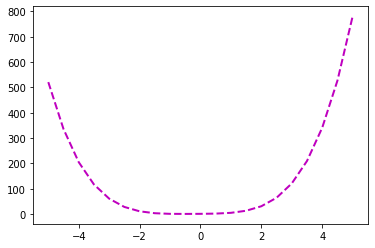

In [83]:
fit_poly(l_a,error_poly,degree=4)

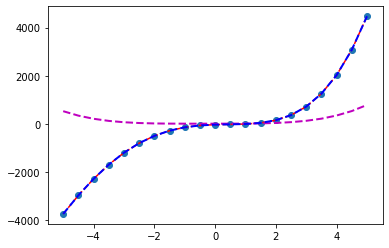

In [87]:
plt.scatter(x=x,y=y)
plt.plot(x,y,'m--',color='red')
x_f = fit_poly(l_a,error_poly,degree=4)
plt.plot(x,np.polyval(x_f,x),'m--',color='blue',linewidth=2.0,label='Optimized')